<a href="https://colab.research.google.com/github/edefang/Eyong/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **How do self-control and addiction level influence the total time individuals waste on social media?**



## Data loading



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Time-Wasters on Social Media.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Time-Wasters on Social Media.csv' not found.")
    df = None

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


## Data exploration



In [2]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df[['Addiction Level', 'Self Control', 'Total Time Spent']].describe())

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df[['Addiction Level', 'Self Control', 'Total Time Spent']].corr()
print(correlation_matrix)

Data Shape: (1000, 31)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   ob

## Data cleaning



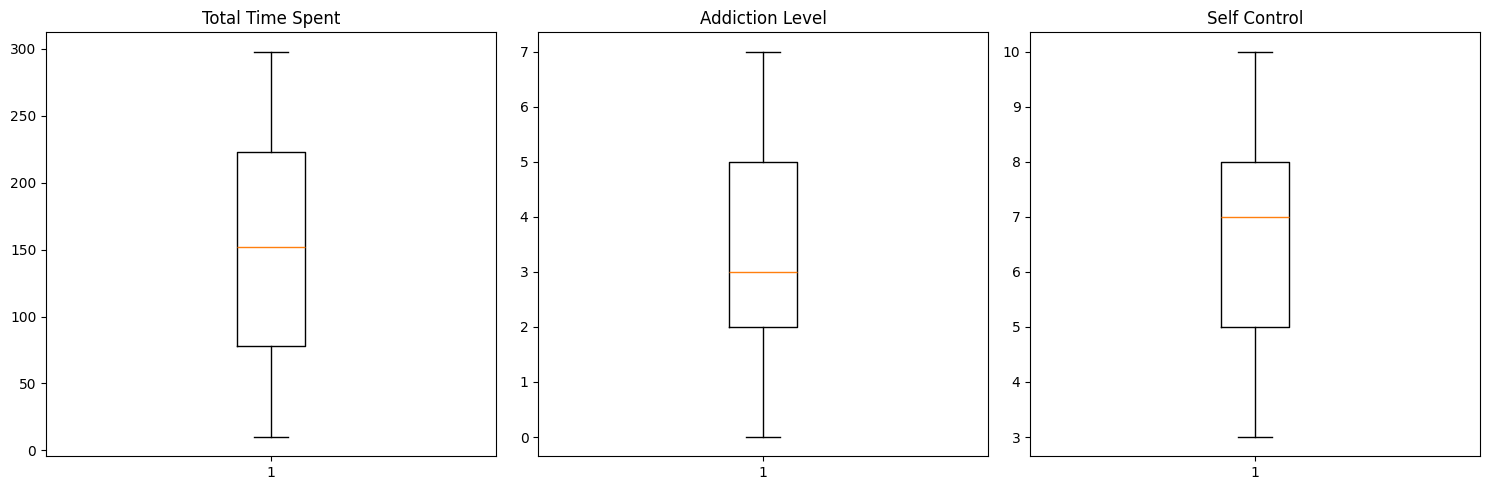

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Income                    1000 non-null   int64  
 5   Debt                      1000 non-null   bool   
 6   Owns Property             1000 non-null   bool   
 7   Profession                1000 non-null   object 
 8   Demographics              1000 non-null   object 
 9   Platform                  1000 non-null   object 
 10  Total Time Spent          1000 non-null   float64
 11  Number of Sessions        1000 non-null   int64  
 12  Video ID                  1000 non-null   int64  
 13  Video Category            1000 non-null   object 
 14  Video Len

In [3]:
import matplotlib.pyplot as plt

# Identify outliers using box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['Total Time Spent'])
plt.title('Total Time Spent')

plt.subplot(1, 3, 2)
plt.boxplot(df['Addiction Level'])
plt.title('Addiction Level')

plt.subplot(1, 3, 3)
plt.boxplot(df['Self Control'])
plt.title('Self Control')

plt.tight_layout()
plt.show()

# Cap outliers at the 99th percentile
for col in ['Total Time Spent', 'Addiction Level', 'Self Control']:
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper_limit)

# Convert data types to numeric if necessary
for col in ['Total Time Spent', 'Addiction Level', 'Self Control']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except Exception as e:
            print(f"Error converting {col}: {e}")
            # Handle the error as needed, e.g., remove rows with invalid values
            # df.dropna(subset=[col], inplace=True)

# Display the first few rows and data types after cleaning
display(df.head())
print(df.info())

# scatter plot as per the user's instructions, using the 'Addiction Level' to color-code the data points.

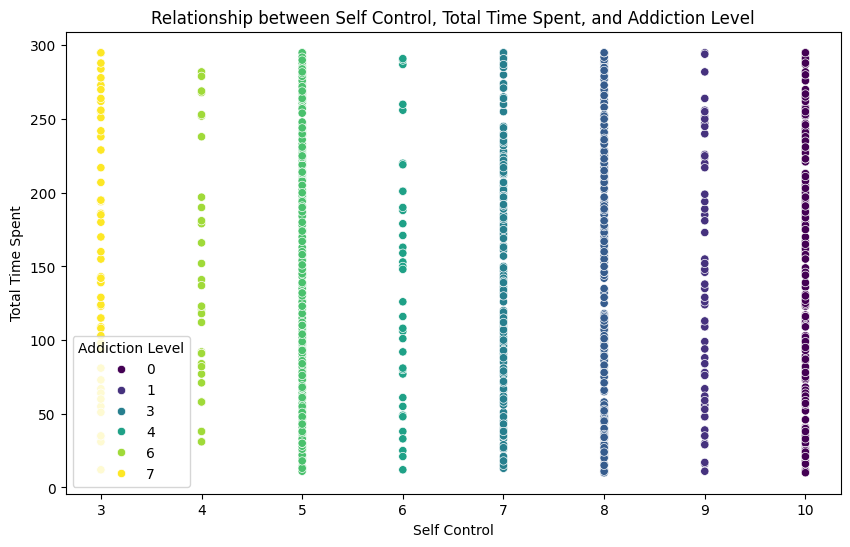

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Self Control', y='Total Time Spent', hue='Addiction Level', data=df, palette='viridis')
plt.xlabel('Self Control')
plt.ylabel('Total Time Spent')
plt.title('Relationship between Self Control, Total Time Spent, and Addiction Level')
plt.legend(title='Addiction Level')
plt.show()

# Box plot Distribution of Total Time Spent on Social Media by Addiction Level over time spent

<ipython-input-5-2d5f10b9eb82>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Addiction Category', y='Total Time Spent', data=df, palette='Set3')


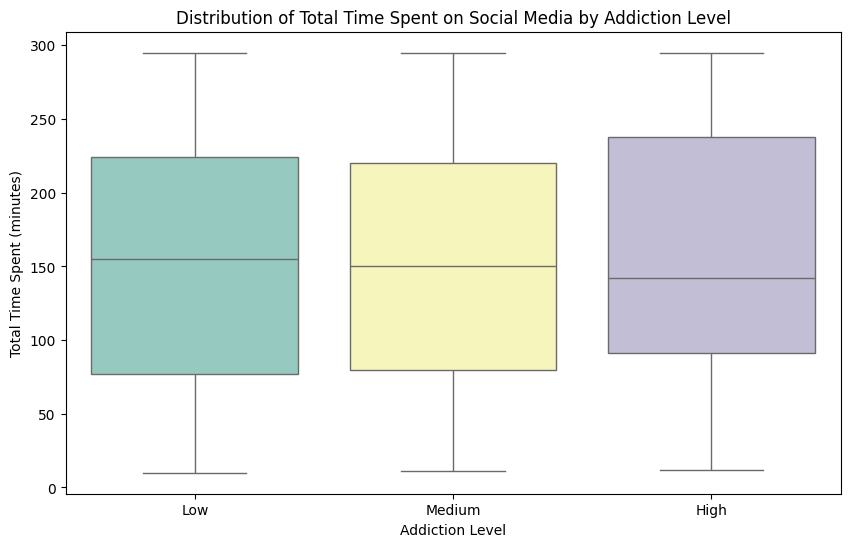

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize Addiction Level
df['Addiction Category'] = pd.cut(df['Addiction Level'], bins=[-float('inf'), 3, 6, float('inf')], labels=['Low', 'Medium', 'High'], right=False)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Addiction Category', y='Total Time Spent', data=df, palette='Set3')
plt.xlabel('Addiction Level')
plt.ylabel('Total Time Spent (minutes)')
plt.title('Distribution of Total Time Spent on Social Media by Addiction Level')
plt.show()

# A correlation heatmap to visualize the relationships between 'Self Control', 'Addiction Level', 'Total Time Spent', and 'Productivity Loss'.

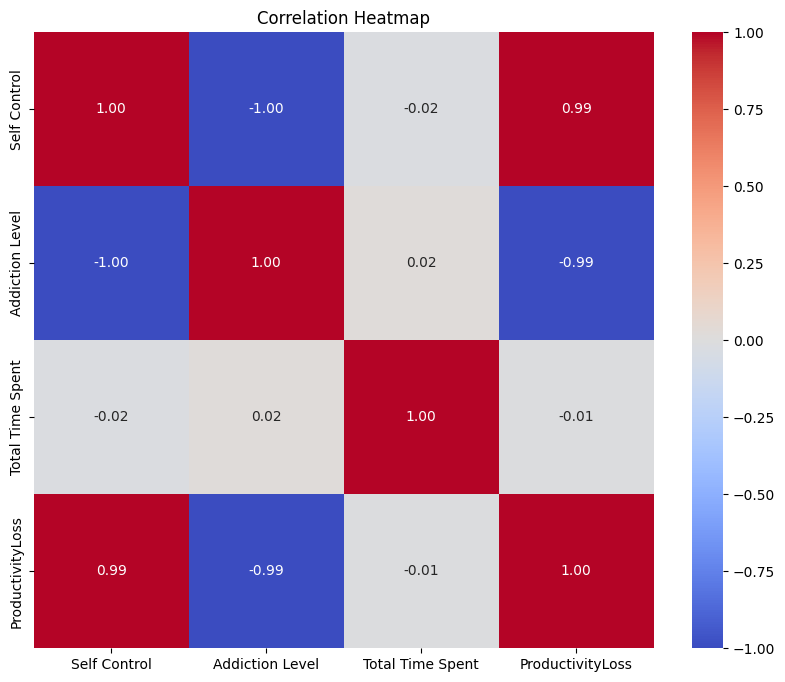

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
cols = ['Self Control', 'Addiction Level', 'Total Time Spent', 'ProductivityLoss']
subset_df = df[cols]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## slipting data



In [9]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows where 'Total Time Spent' or features are missing after cleaning
df.dropna(subset=['Total Time Spent', 'Addiction Level', 'Self Control'], inplace=True)

# Define features (X) and target (y)
X = df[['Self Control', 'Addiction Level']]
y = df['Total Time Spent']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree Regressor model
# We are using a Regressor because the target variable ('Total Time Spent') is continuous.
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# You can also print the feature importances to see which feature contributed more
print("\nFeature Importances:")
for feature, importance in zip(X.columns, dt_model.feature_importances_):
    print(f"{feature}: {importance}")

# You can further analyze the predictions vs actual values if needed
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print("\nSample of Actual vs Predicted Values:")
# print(results.head())

Mean Squared Error (MSE): 7248.001226493527
R-squared (R2): -0.030345775632323102

Feature Importances:
Self Control: 0.5118612316475302
Addiction Level: 0.4881387683524699


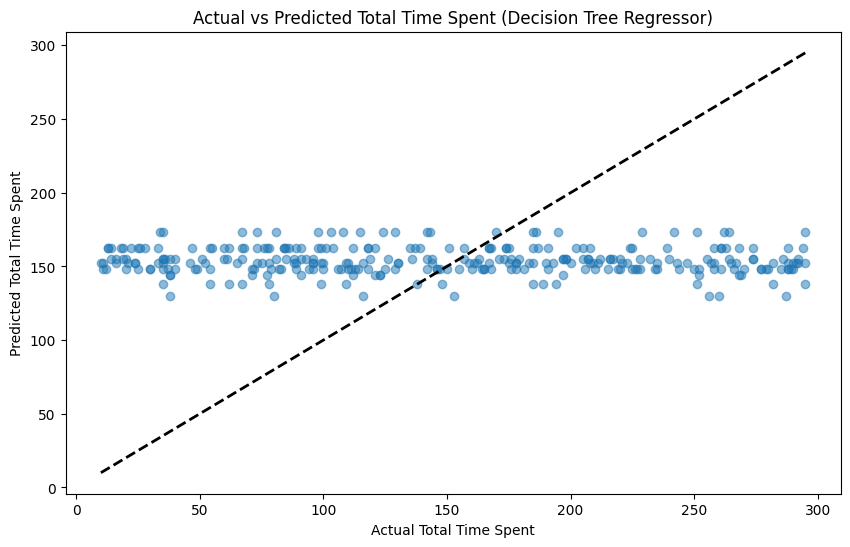

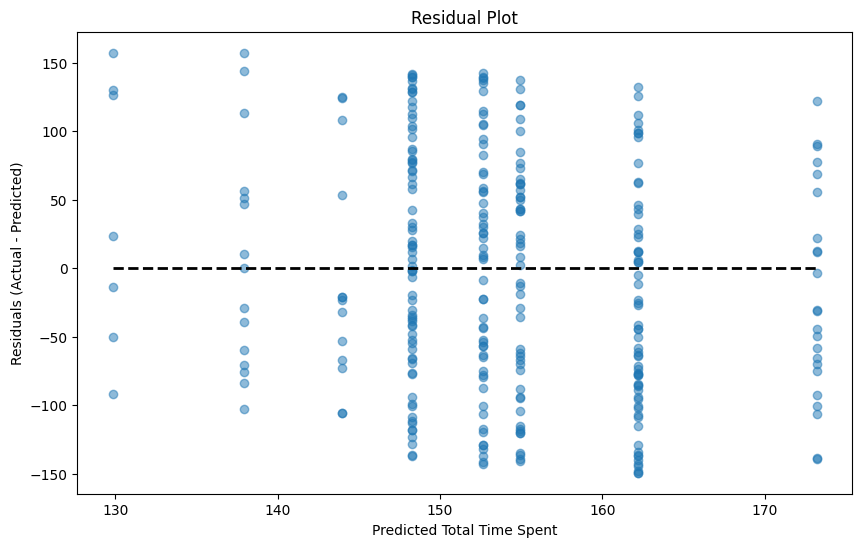

In [14]:
# prompt: # You can further analyze the predictions vs actual values if needed
# # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# # print("\nSample of Actual vs Predicted Values:")
# # print(results.head())

import matplotlib.pyplot as plt
# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Total Time Spent")
plt.ylabel("Predicted Total Time Spent")
plt.title("Actual vs Predicted Total Time Spent (Decision Tree Regressor)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Total Time Spent")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.hlines(0, y_pred.min(), y_pred.max(), colors='k', linestyles='--', lw=2)
plt.show()

# You could also plot the decision tree itself if you want to visualize the rules,
# but for a complex tree, this might not be very informative.
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,10))
# plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
# plt.show()

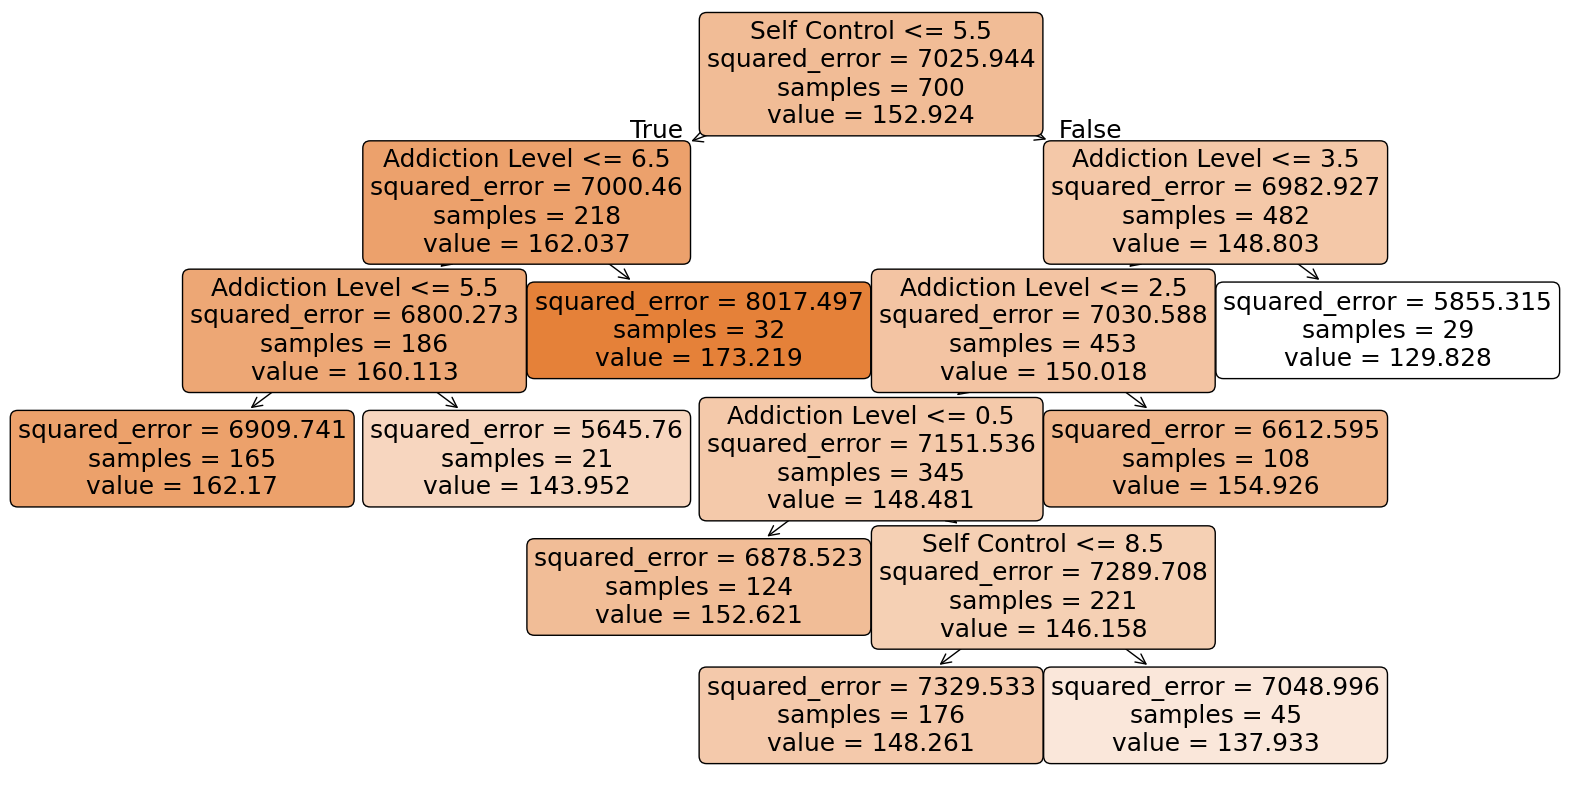

In [15]:


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## Plot of the tree

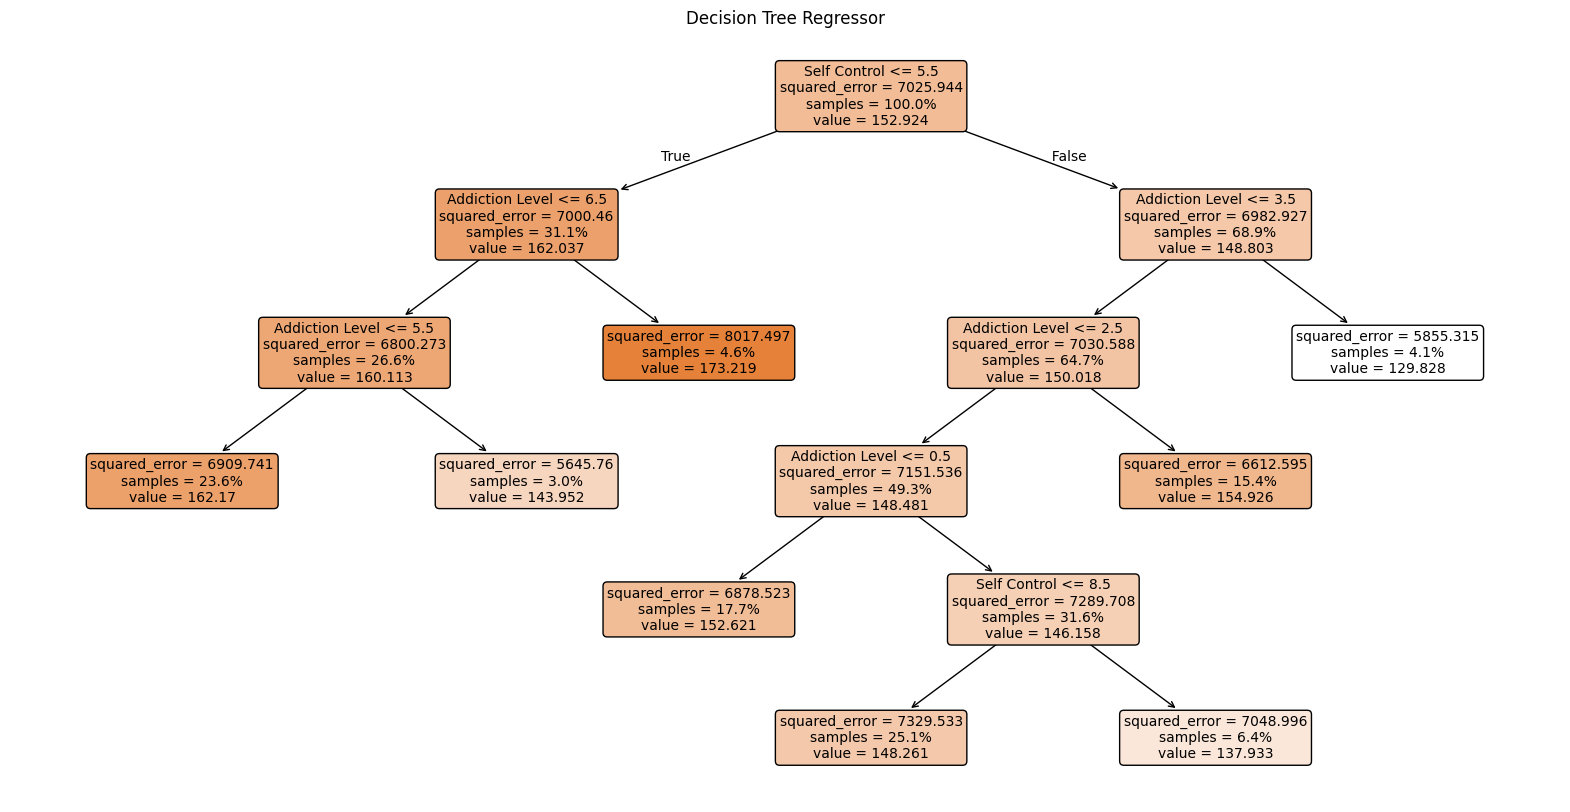

In [10]:
# prompt: plot the decision tree

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True, proportion=True, fontsize=10)
plt.title('Decision Tree Regressor')
plt.show()

Mean Squared Error (MSE): 12467.77
R-squared (R2): -0.9283006006980614

Feature Importances:
Age                 0.102689
Addiction Level     0.018983
Self Control        0.018527
Location_Vietnam    0.015125
Gender_Male         0.014568
                      ...   
Income_71578        0.000000
Income_42207        0.000000
Income_42669        0.000000
Income_42736        0.000000
Income_36154        0.000000
Length: 1009, dtype: float64


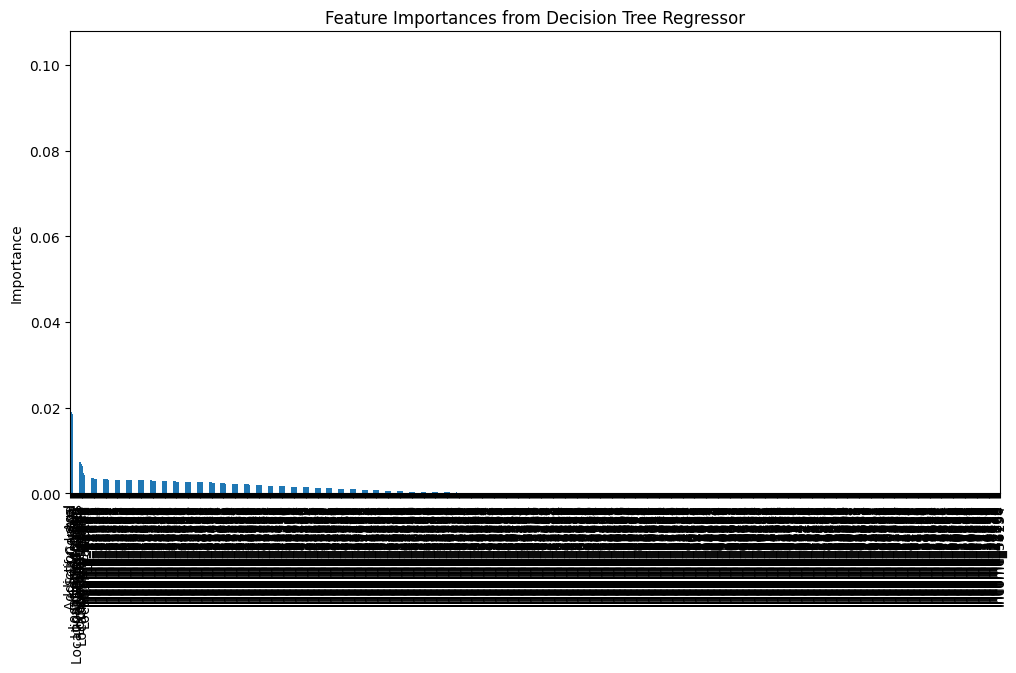

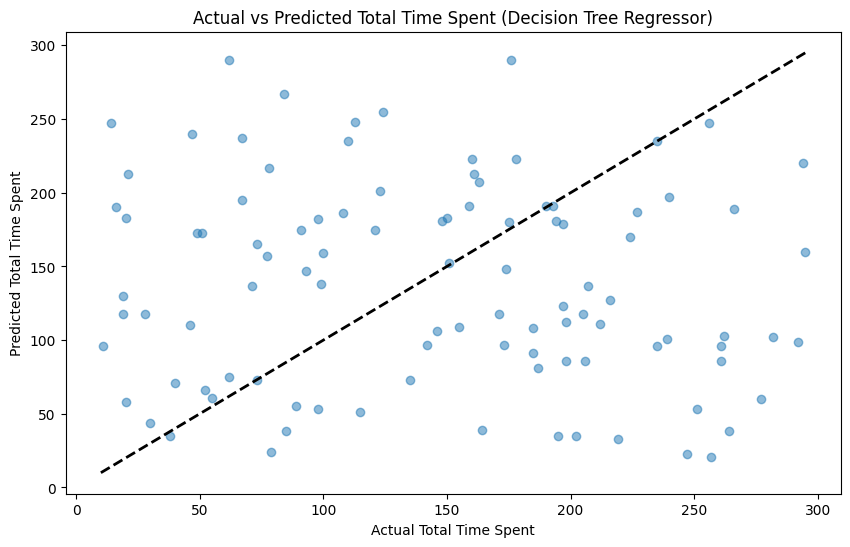

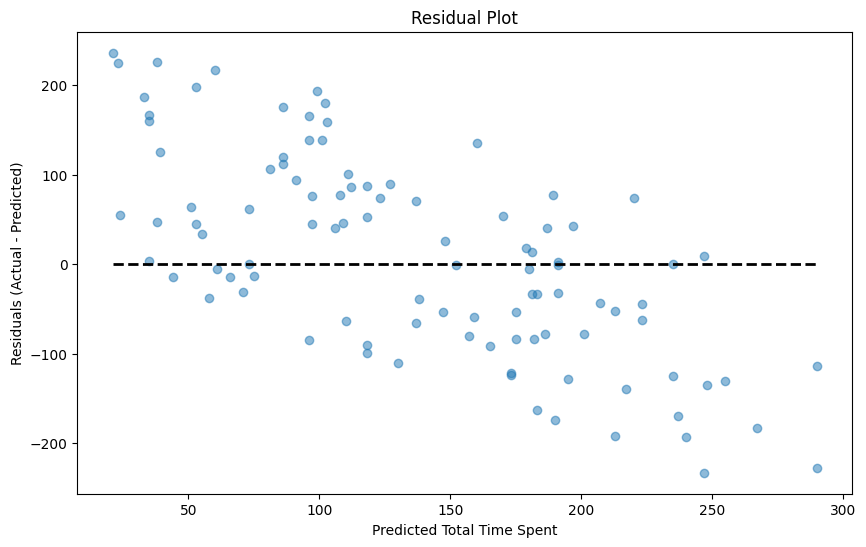

In [21]:
# prompt: lets split the data into 10% and using skylearn start a decision tree  to answer the quesiont also use varible such as  age gender loaction income  the most important one

import pandas as pd
import matplotlib.pyplot as plt
# Add 'Age', 'Gender', 'Location', 'Income' to features, handling categorical data if necessary

# Assuming 'Gender', 'Location', and 'Income' are categorical and need one-hot encoding
# If they are already numeric or have a clear ordinal relationship, adjust accordingly

# Select relevant columns including new ones and the target
features = ['Self Control', 'Addiction Level', 'Age', 'Gender', 'Location', 'Income']
target = 'Total Time Spent'

# Drop rows where the target or the selected features are missing
df_model = df.copy()
df_model.dropna(subset=[target] + features, inplace=True)

# Separate target and features
X = df_model[features]
y = df_model[target]

# Identify categorical and numerical features
categorical_features = ['Gender', 'Location', 'Income'] # Update this list based on your actual data types
numerical_features = ['Self Control', 'Addiction Level', 'Age']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Print feature importances
print("\nFeature Importances:")
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

# You can also plot the feature importances for better visualization
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree Regressor')
plt.ylabel('Importance')
plt.show()

# You can further analyze the predictions vs actual values if needed
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print("\nSample of Actual vs Predicted Values:")
# print(results.head())

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Total Time Spent")
plt.ylabel("Predicted Total Time Spent")
plt.title("Actual vs Predicted Total Time Spent (Decision Tree Regressor)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Total Time Spent")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.hlines(0, y_pred.min(), y_pred.max(), colors='k', linestyles='--', lw=2)
plt.show()

# Plot the decision tree (can be very large depending on tree depth)
# plt.figure(figsize=(30,15))
# plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
# plt.title('Decision Tree Regressor')
# plt.show()


In [20]:
feature_names = X.columns
feature_names

Index(['Self Control', 'Addiction Level', 'ProductivityLoss'], dtype='object')